In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import sklearn
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
raw_data=pd.read_csv(r'C:\Users\USER\Downloads\archive.zip')
raw_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
data_1=raw_data.drop(labels=['name','released'],axis=1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7591 non-null   object 
 1   genre     7668 non-null   object 
 2   year      7668 non-null   int64  
 3   score     7665 non-null   float64
 4   votes     7665 non-null   float64
 5   director  7668 non-null   object 
 6   writer    7665 non-null   object 
 7   star      7667 non-null   object 
 8   country   7665 non-null   object 
 9   budget    5497 non-null   float64
 10  gross     7479 non-null   float64
 11  company   7651 non-null   object 
 12  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 778.9+ KB


In [5]:
data_1.duplicated().sum()

0

In [6]:
data_no_mv=data_1.dropna(axis=0)
data_no_mv.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    5421 non-null   object 
 1   genre     5421 non-null   object 
 2   year      5421 non-null   int64  
 3   score     5421 non-null   float64
 4   votes     5421 non-null   float64
 5   director  5421 non-null   object 
 6   writer    5421 non-null   object 
 7   star      5421 non-null   object 
 8   country   5421 non-null   object 
 9   budget    5421 non-null   float64
 10  gross     5421 non-null   float64
 11  company   5421 non-null   object 
 12  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 592.9+ KB


<Axes: ylabel='gross'>

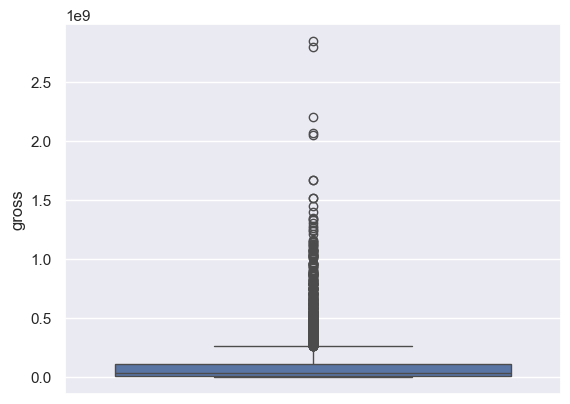

In [7]:
sns.boxplot(data_no_mv['gross'])

<Axes: ylabel='gross'>

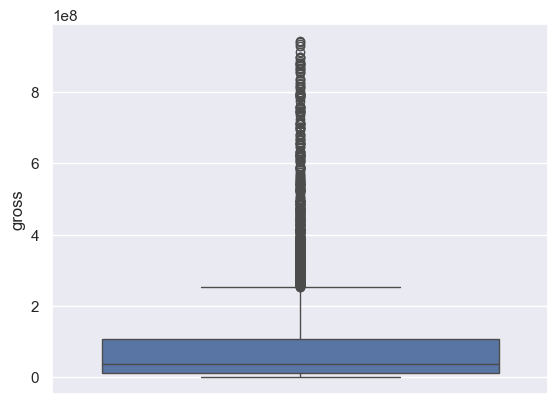

In [8]:
a=data_no_mv['gross'].quantile(0.99)
data_2=data_no_mv[data_no_mv['gross']<a]
sns.boxplot(data_2['gross'])


<Axes: xlabel='gross', ylabel='Count'>

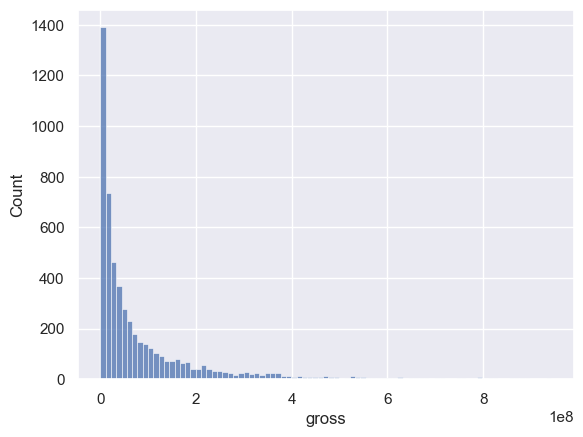

In [9]:
sns.histplot(data_2['gross'])


<Axes: ylabel='budget'>

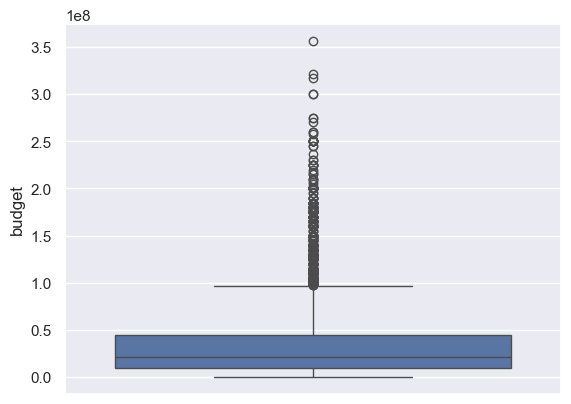

In [10]:
sns.boxplot(data_no_mv['budget'])

<Axes: ylabel='budget'>

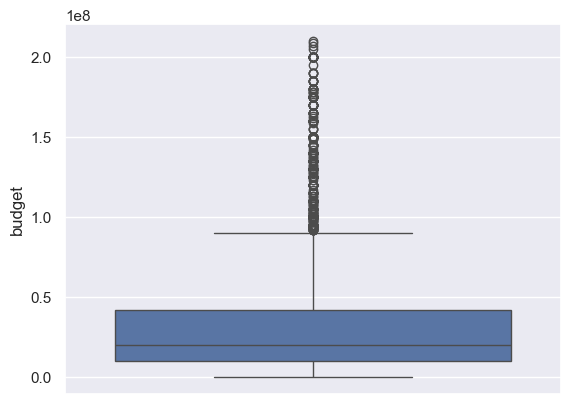

In [11]:
b=data_2['budget'].quantile(0.997)
data_3=data_2[data_2['budget']<b]
sns.boxplot(data_3['budget'])

<Axes: xlabel='budget', ylabel='Count'>

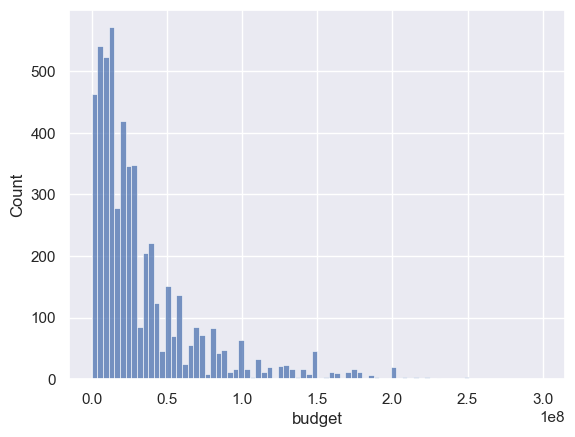

In [12]:
sns.histplot(data_2['budget'])

In [13]:
data_3.describe(include='all')

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
count,5349,5349,5349.000000,5349.000000,5.349000e+03,5349,5349,5349,5349,5.349000e+03,5.349000e+03,5349,5349.000000
unique,10,15,NaN,NaN,NaN,2060,3201,1840,50,NaN,NaN,1472,NaN
top,R,Comedy,NaN,NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,2596,1496,NaN,NaN,NaN,33,32,40,4261,NaN,NaN,324,NaN
mean,NaN,NaN,2001.512432,6.381417,1.087380e+05,NaN,NaN,NaN,NaN,3.380458e+07,8.964307e+07,NaN,107.784633
std,NaN,NaN,10.509998,0.960120,1.710912e+05,NaN,NaN,NaN,NaN,3.642421e+07,1.369985e+08,NaN,17.739461
min,NaN,NaN,1980.000000,1.900000,1.950000e+02,NaN,NaN,NaN,NaN,6.000000e+03,3.090000e+02,NaN,63.000000
25%,NaN,NaN,1993.000000,5.800000,1.900000e+04,NaN,NaN,NaN,NaN,1.000000e+07,1.059218e+07,NaN,95.000000
50%,NaN,NaN,2002.000000,6.400000,5.100000e+04,NaN,NaN,NaN,NaN,2.000000e+07,3.554776e+07,NaN,105.000000
75%,NaN,NaN,2010.000000,7.000000,1.240000e+05,NaN,NaN,NaN,NaN,4.200000e+07,1.063871e+08,NaN,117.000000


In [14]:
features = ['year', 'score','runtime', 'budget', 'gross','votes']
df_selected = data_3[features]
correlation_matrix = df_selected.corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,year,score,runtime,budget,gross,votes
year,1.000000,0.046932,0.058521,0.311457,0.273619,0.194309
score,0.046932,1.000000,0.409332,0.035087,0.208872,0.468321
runtime,0.058521,0.409332,1.000000,0.270196,0.222651,0.315030
budget,0.311457,0.035087,0.270196,1.000000,0.711505,0.385763
gross,0.273619,0.208872,0.222651,0.711505,1.000000,0.607778
votes,0.194309,0.468321,0.315030,0.385763,0.607778,1.000000


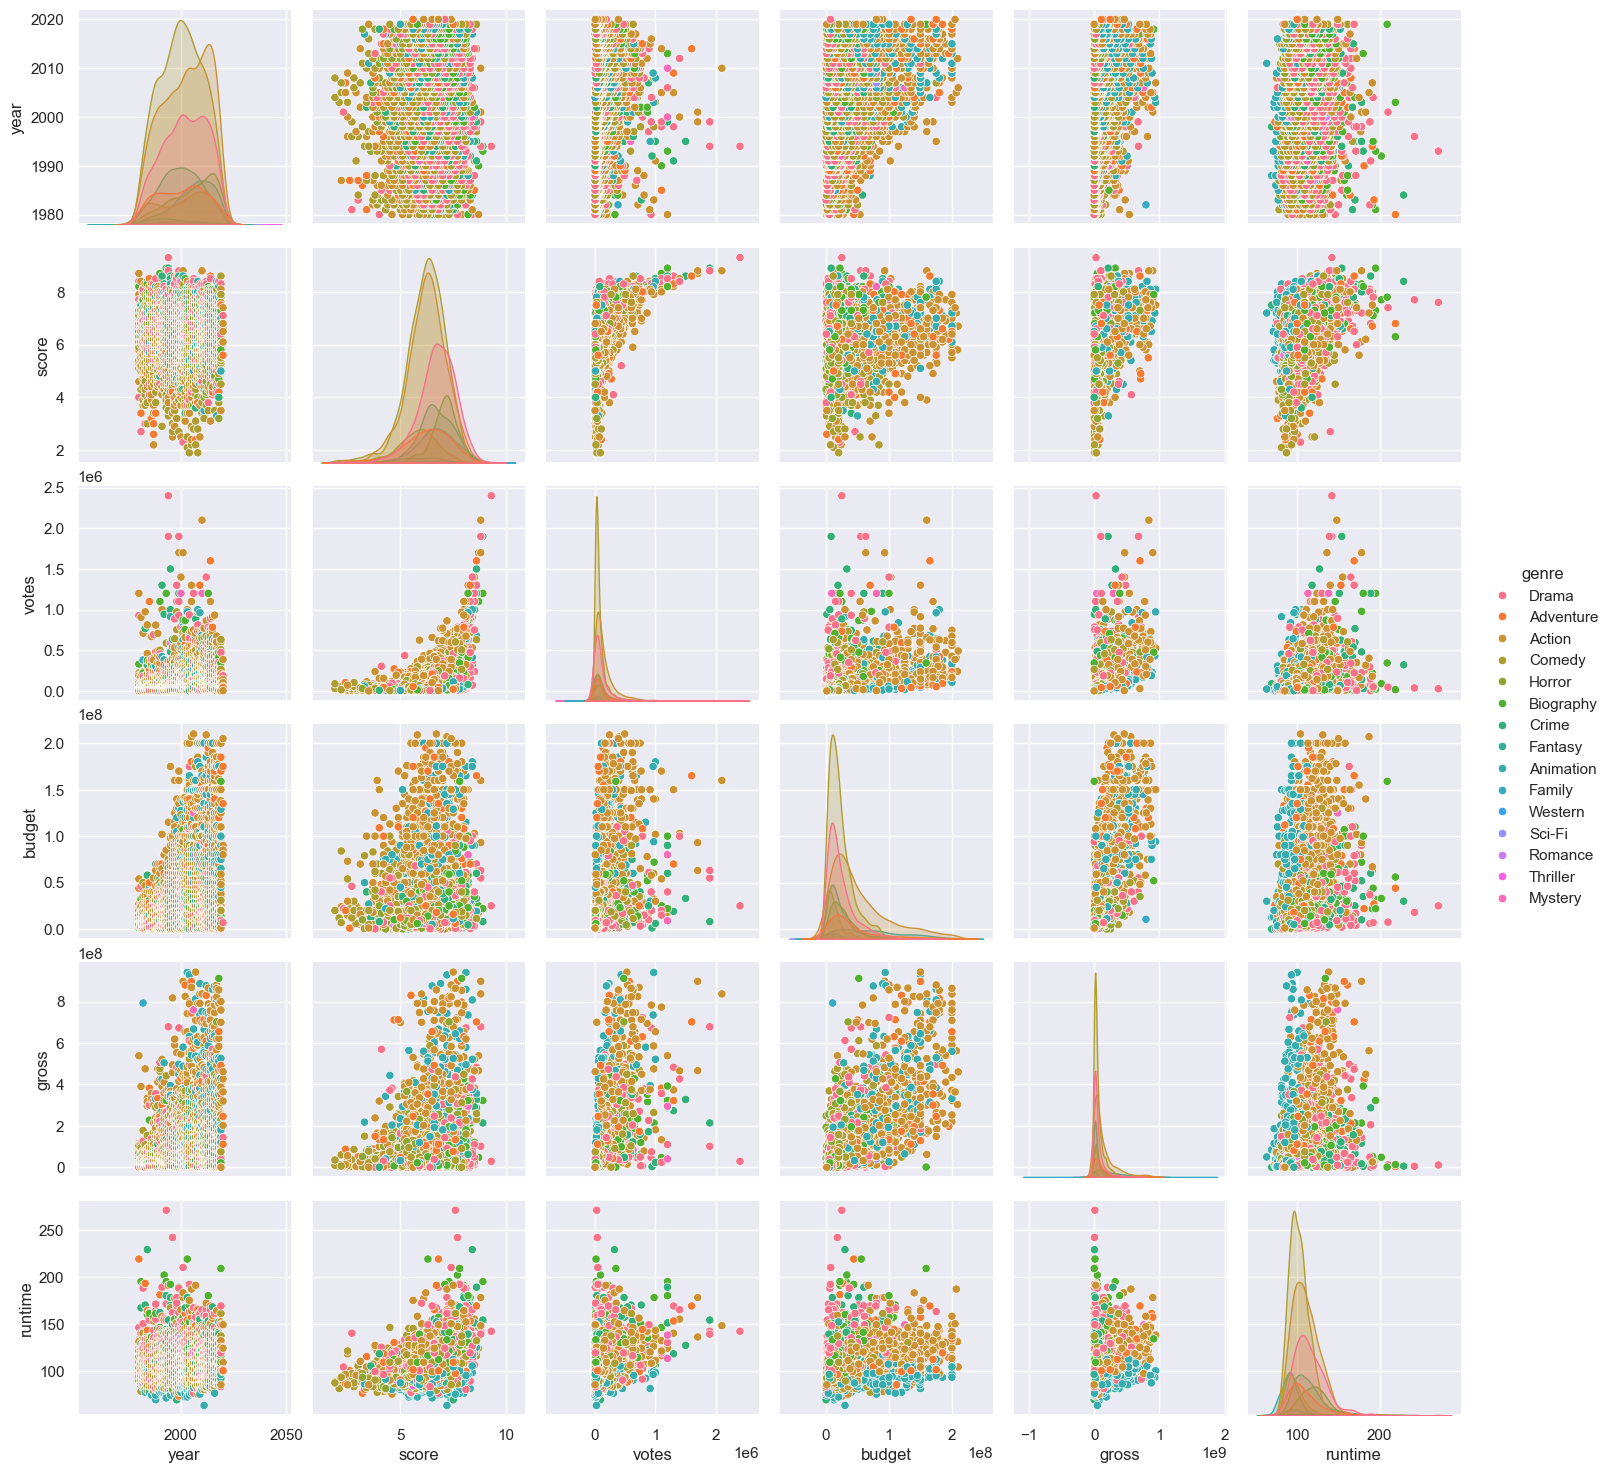

In [15]:
sns.pairplot(data_3, hue="genre")
plt.show()

In [16]:
data_3['root_budget']=np.sqrt(data_3['budget'])
data_3['root_gross']=np.sqrt(data_3['gross'])
data_3['root_votes']=np.sqrt(data_3['votes'])

C:\Users\USER\AppData\Local\Temp\ipykernel_15104\1615759123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['root_budget']=np.sqrt(data_3['budget'])
C:\Users\USER\AppData\Local\Temp\ipykernel_15104\1615759123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['root_gross']=np.sqrt(data_3['gross'])
C:\Users\USER\AppData\Local\Temp\ipykernel_15104\1615759123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [17]:
data_4=data_3.drop(labels=['budget','gross','votes'],axis=1)
data_4

,rating,genre,year,score,director,writer,star,country,company,runtime,root_budget,root_gross,root_votes
0,R,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146.0,4358.898944,6855.565039,962.808392
1,R,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104.0,2121.320344,7671.577804,254.950976
2,PG,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124.0,4242.640687,23202.910744,1095.445115
3,PG,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88.0,1870.828693,9135.290855,470.106371
4,R,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98.0,2449.489743,6312.396059,328.633535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,R,Action,2020,6.6,Adil El Arbi,Peter Craig,Will Smith,United States,Columbia Pictures,124.0,9486.832981,20652.003390,374.165739
7649,PG,Action,2020,6.5,Jeff Fowler,Pat Casey,Ben Schwartz,United States,Paramount Pictures,99.0,9219.544457,17880.595152,319.374388
7650,PG,Adventure,2020,5.6,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,Universal Pictures,101.0,13228.756555,15668.048794,230.217289
7651,PG,Adventure,2020,6.8,Chris Sanders,Michael Green,Harrison Ford,Canada,20th Century Studios,100.0,11618.950039,10540.659230,204.939015


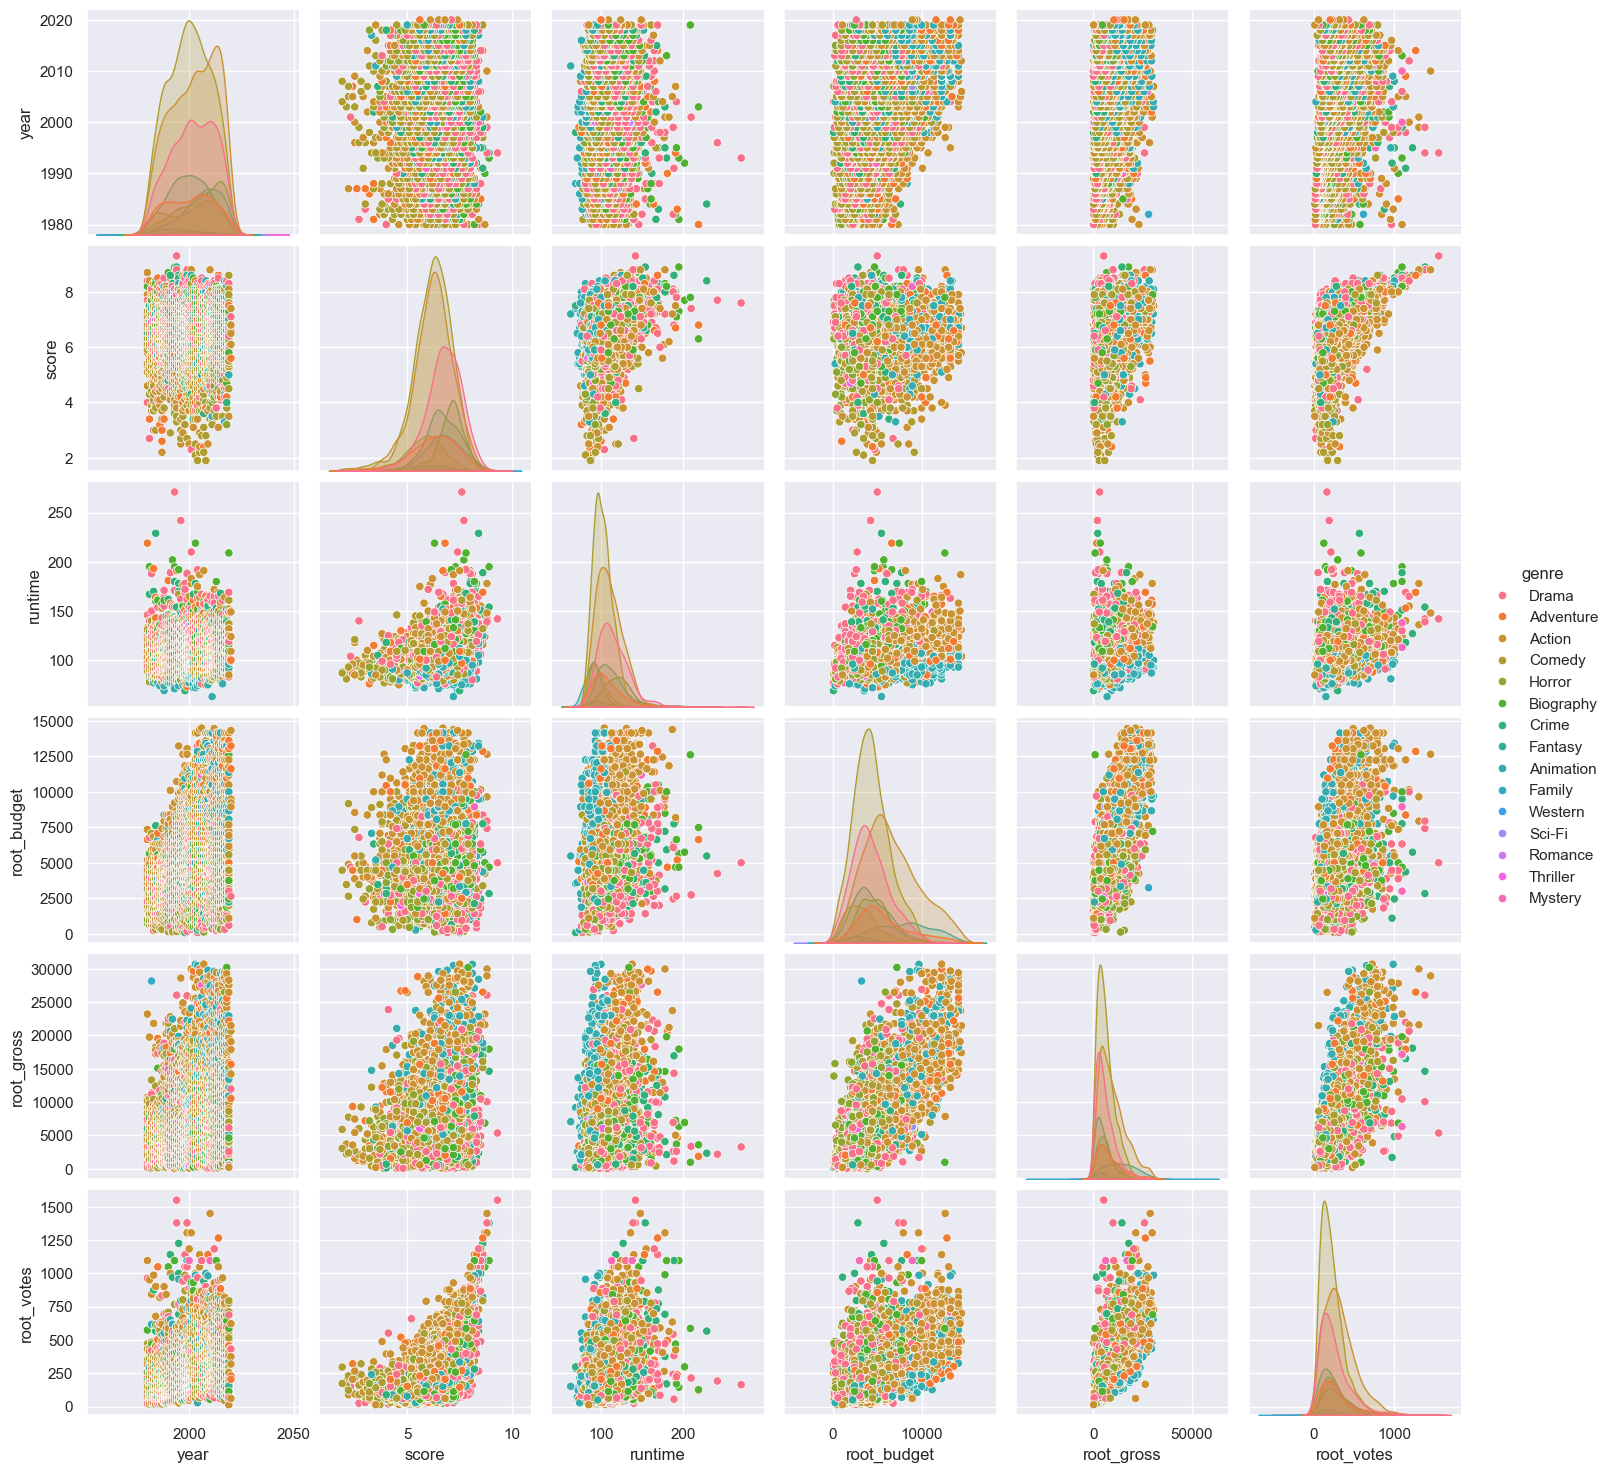

In [18]:
sns.pairplot(data_4, hue="genre")
plt.show()

In [19]:
columns_to_standardize = data_4.iloc[:, [2,3,9,10,11,12]]
scaler = StandardScaler()
standardized_columns = scaler.fit_transform(columns_to_standardize)
data_4.iloc[:, [2,3,9,10,11,12]] = standardized_columns
data_4.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15104\2921709144.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-2.04704537 -2.04704537 -2.04704537 ...  1.75921019  1.75921019
  1.75921019]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_4.iloc[:, [2,3,9,10,11,12]] = standardized_columns


,rating,genre,year,score,director,writer,star,country,company,runtime,root_budget,root_gross,root_votes
0,R,Drama,-2.047045,2.102623,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,2.154459,-0.276808,-0.111695,3.673095
1,R,Adventure,-2.047045,-0.605623,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,-0.213365,-1.089535,0.029544,-0.083025
2,PG,Action,-2.047045,2.415114,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,0.914170,-0.319035,2.717777,4.376908
3,PG,Comedy,-2.047045,1.373480,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,-1.115394,-1.180518,0.282890,1.058659
4,R,Comedy,-2.047045,0.956827,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,-0.551626,-0.970338,-0.205709,0.307959


In [20]:
columns= ['rating', 'genre', 'company', 'director', 'writer', 'star', 'country']

data_4['company'].value_counts().head(10)

company
Universal Pictures           324
Columbia Pictures            297
Warner Bros.                 287
Paramount Pictures           276
Twentieth Century Fox        207
New Line Cinema              152
Touchstone Pictures          105
Metro-Goldwyn-Mayer (MGM)     96
Walt Disney Pictures          89
TriStar Pictures              75
Name: count, dtype: int64

In [21]:
data_5=data_4.drop(columns=columns)
data_5=data_5.reset_index()
data_5

,index,year,score,runtime,root_budget,root_gross,root_votes
0,0,-2.047045,2.102623,2.154459,-0.276808,-0.111695,3.673095
1,1,-2.047045,-0.605623,-0.213365,-1.089535,0.029544,-0.083025
2,2,-2.047045,2.415114,0.914170,-0.319035,2.717777,4.376908
3,3,-2.047045,1.373480,-1.115394,-1.180518,0.282890,1.058659
4,4,-2.047045,0.956827,-0.551626,-0.970338,-0.205709,0.307959
...,...,...,...,...,...,...,...
5344,7648,1.759210,0.227683,0.914170,1.585747,2.276255,0.549567
5345,7649,1.759210,0.123520,-0.495249,1.488663,1.796567,0.258827
5346,7650,1.759210,-0.813950,-0.382496,2.944878,1.413609,-0.214269
5347,7651,1.759210,0.436010,-0.438872,2.360169,0.526138,-0.348404


In [22]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded_data = encoder.fit_transform(data_4[columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))
encoded_df=encoded_df.reset_index()
final_df = pd.concat([data_5, encoded_df], axis=1)
final_df

,index,year,score,runtime,root_budget,root_gross,root_votes,index,rating_Approved,rating_G,...,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_West Germany,country_Yugoslavia
0,0,-2.047045,2.102623,2.154459,-0.276808,-0.111695,3.673095,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,-2.047045,-0.605623,-0.213365,-1.089535,0.029544,-0.083025,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,-2.047045,2.415114,0.914170,-0.319035,2.717777,4.376908,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,-2.047045,1.373480,-1.115394,-1.180518,0.282890,1.058659,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,-2.047045,0.956827,-0.551626,-0.970338,-0.205709,0.307959,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,7648,1.759210,0.227683,0.914170,1.585747,2.276255,0.549567,5344,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5345,7649,1.759210,0.123520,-0.495249,1.488663,1.796567,0.258827,5345,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5346,7650,1.759210,-0.813950,-0.382496,2.944878,1.413609,-0.214269,5346,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5347,7651,1.759210,0.436010,-0.438872,2.360169,0.526138,-0.348404,5347,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data_preprocessed=final_df.dropna()
data_preprocessed


,index,year,score,runtime,root_budget,root_gross,root_votes,index,rating_Approved,rating_G,...,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_West Germany,country_Yugoslavia
0,0,-2.047045,2.102623,2.154459,-0.276808,-0.111695,3.673095,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,-2.047045,-0.605623,-0.213365,-1.089535,0.029544,-0.083025,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,-2.047045,2.415114,0.914170,-0.319035,2.717777,4.376908,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,-2.047045,1.373480,-1.115394,-1.180518,0.282890,1.058659,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,-2.047045,0.956827,-0.551626,-0.970338,-0.205709,0.307959,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,7648,1.759210,0.227683,0.914170,1.585747,2.276255,0.549567,5344,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5345,7649,1.759210,0.123520,-0.495249,1.488663,1.796567,0.258827,5345,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5346,7650,1.759210,-0.813950,-0.382496,2.944878,1.413609,-0.214269,5346,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5347,7651,1.759210,0.436010,-0.438872,2.360169,0.526138,-0.348404,5347,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.feature_selection import f_regression, SelectKBest
selector = SelectKBest(score_func=f_regression, k=100)

In [25]:
targets = data_preprocessed['root_gross']
inputs = data_preprocessed.drop(['root_gross'],axis=1)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [27]:
x_train_new = selector.fit_transform(x_train,y_train)
x_test_new = selector.transform(x_test)

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_new,y_train)

LinearRegression()

In [29]:
reg.score(x_test_new,y_test)


0.7657404640455034

In [30]:
reg.score(x_train_new,y_train)

0.7676832025837408

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
reg2 = DecisionTreeRegressor(criterion='squared_error',max_depth=6)

In [33]:
reg2.fit(x_train_new,y_train)

DecisionTreeRegressor(max_depth=6)

In [34]:
reg2.score(x_train_new,y_train)

0.7699446178007117

In [35]:
reg2.score(x_test_new,y_test)

0.7174116590870456

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
reg3 = RandomForestRegressor(n_estimators=100,max_depth=11,max_samples=0.5,oob_score=True)

In [38]:
reg3.fit(x_train_new,y_train)

RandomForestRegressor(max_depth=11, max_samples=0.5, oob_score=True)

In [39]:
reg3.score(x_test_new,y_test)

0.8006130040046704

In [40]:
reg3.score(x_train_new,y_train)

0.8928832445795594

In [41]:
reg3.oob_score_

0.7796339865886943

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
reg4 = GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.1)

In [44]:
reg4.fit(x_train_new,y_train)

GradientBoostingRegressor(max_depth=5)

In [45]:
reg4.score(x_test_new,y_test)

0.8165434189111752

In [46]:
reg4.score(x_train_new,y_train)

0.887384897613415

In [47]:
from xgboost import XGBRegressor

In [48]:
reg5 = XGBRegressor(
    objective='reg:squarederror', 
    booster = 'gbtree', 
    n_estimators=100,              
    max_depth=5,                   
    learning_rate=0.09,         
    subsample=0.5,               
    colsample_bytree =0.8, 
    colsample_bylevel = 0.8, 
    colsample_bynode = 0.8,          
    random_state=365               
)

In [49]:
reg5.fit(x_train_new,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=365, ...)

In [50]:
reg5.score(x_test_new,y_test)

0.8222889249102515

In [51]:
reg5.score(x_train_new,y_train)

0.8686040326038382

In [86]:
from sklearn.ensemble import VotingRegressor

In [98]:
estimators = [
    ('lr',LinearRegression()),
    ('dt',DecisionTreeRegressor()),
    ('rf',RandomForestRegressor()),
    ('gb',GradientBoostingRegressor()),
    ('xgb', XGBRegressor())
]

In [103]:
model_6 = VotingRegressor(estimators=estimators)

In [104]:
model_6.fit(x_train_new,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [105]:
model_6.score(x_test_new,y_test)

0.8036026644902331

In [106]:
from sklearn.ensemble import StackingRegressor

In [111]:
estimators2 = [
    ('lr',LinearRegression()),
    ('dt',DecisionTreeRegressor(criterion='squared_error',max_depth=6)),
    ('rf',RandomForestRegressor(n_estimators=100,max_depth=11,max_samples=0.5,oob_score=True)),
    ('gb',GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.1)),
    ('xgb', XGBRegressor(
    objective='reg:squarederror', 
    booster = 'gbtree', 
    n_estimators=100,              
    max_depth=5,                   
    learning_rate=0.09,         
    subsample=0.5,               
    colsample_bytree =0.8, 
    colsample_bylevel = 0.8, 
    colsample_bynode = 0.8,          
    random_state=365               
))
]

In [118]:
model_7 = StackingRegressor(
    estimators=estimators2,
    final_estimator=RandomForestRegressor(),
    cv=10
)

In [119]:
model_7.fit(x_train_new,y_train)

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor(max_depth=6)),
                              ('rf',
                               RandomForestRegressor(max_depth=11,
                                                     max_samples=0.5,
                                                     oob_score=True)),
                              ('gb', GradientBoostingRegressor(max_depth=5)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=0.8,
                                            colsample_bynode=0.8,
                                            colsample_bytre...
                                            interaction_constraints=None,
                                            learning_rate=0.09, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=365, ...))],
                  final_estimator=RandomForestRegressor())

In [120]:
model_7.score(x_test_new,y_test)

0.8014470628854561

In [121]:
model_7.score(x_train_new,y_train)

0.8710584518717847

In [122]:
y_hat_train=reg5.predict(x_train_new)

In [123]:
y_hat_test = reg5.predict(x_test_new)

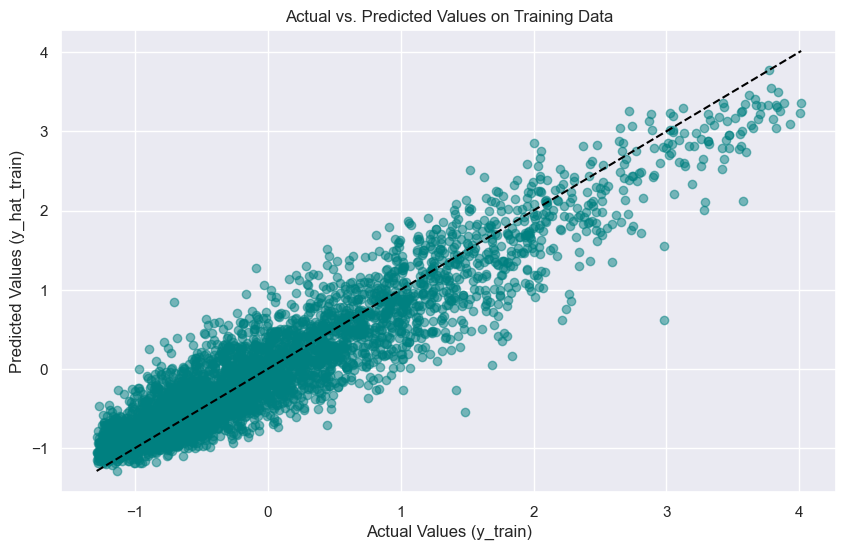

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_hat_train, color='teal', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_hat_train)')
plt.title('Actual vs. Predicted Values on Training Data')
plt.grid(True)
plt.show()

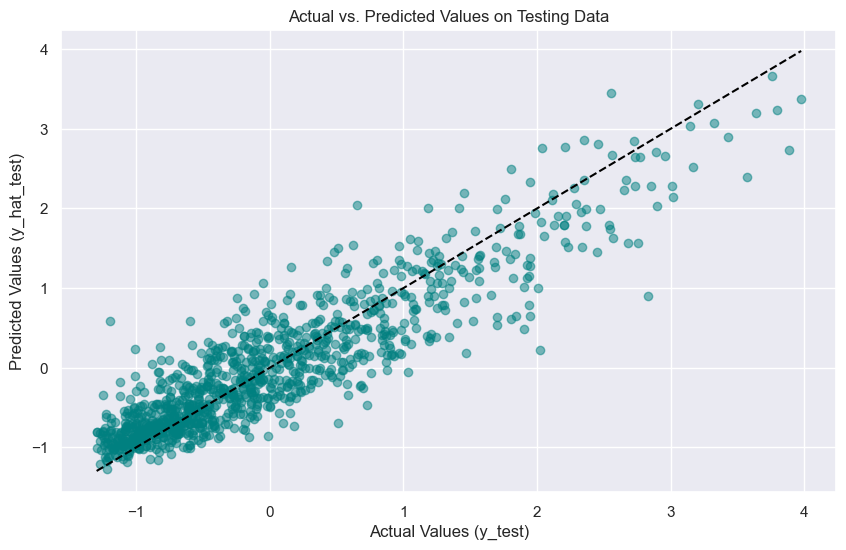

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, color='teal', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_hat_test)')
plt.title('Actual vs. Predicted Values on Testing Data')
plt.grid(True)
plt.show()